# Investigating Fandango Movie Ratings

In October 2015, Walt Hicket analyzed movie ratings data and found strong evidence to suggesr Fandango was infalting their movie rating scores- the article can be found here: __[Inflated Moving Ratings Article](https://fivethirtyeight.com/features/fandango-movies-ratings/)__  
In this project, we will investigate if Fandango is still inflating their movie scores.

### Exploring the Data

In [54]:
import pandas as pd
fandango_score = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [55]:
fandango_score.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [56]:
movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [57]:
fandango_2015 = fandango_score[['FILM', 
                                'Fandango_Stars', 
                                'Fandango_Ratingvalue',
                                'Fandango_votes',
                                'Fandango_Difference'
                               ]].copy()

In [58]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [59]:
fandango_2016 = movie_ratings[['movie',
                              'year',
                               'fandango'
                              ]].copy()

In [60]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


For our goal, the population of interest is all the movie ratings from Fandango, regardless of release year. We are trying to determine if there has been a change in the ratings after the analysis was released on FiveThirtyEight, so we want to compare the movie ratings from two different points in time- prior to the article publishing data and after.

The first data set from Walt Hickey selected films that had tickets on sale in 2015 and had at least 30 reviews.  
The second set of data, collected by Dataquest, selected films that were released in 2016 or later and had a "significant number of votes" (Exact quantity not specified).  
Based on this, the selection was not random because not every movie had an equal chance of being included. The data set is also subject to temporal trends; we do not know if these movies are representative of all movie scores prior to and after Walt's analysis.  
It's possible that based on our goal, this data may not be the most representative and could perhaps lead us to incorrect conclusions.

### Changing the Goal of Our Analysis

Based on these shortcomings, we can either collect new data or change the goal of our analysis by placing some limitations on it.  
Our new goal will be to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal, which was to determine wheater there was any change in Fandango's rating system after Walt's analysis.  

### Checking our Samples

We now have two populations that we want to describe and compare with each other:  
 - All Fandango's ratings for popular movies released in 2015.
 - All Fandango's ratings for popular movies released in 2016.  
 
We will define popular using Walt Hickey's benchmark of 30 fan ratings, and consider a movie as popular only if it has 30 or more fan ratings on Fandango.

In [61]:
fandango_2015[fandango_2015['Fandango_votes'] < 30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


There are not any movies in the fandang0_2015 set that have under 30 votes, so, we can move forward with this dataset of popular movies with confidence.

The second dataset does not provide information about the number of fan ratings. To check if that data is representative, we will randomly select a subset of data and check the number of fan ratings on Fandango's website. Ideally, at least 8 out of 10 will have at least 30 ratings or over.

In [62]:
fandango_2016.sample(10, random_state = 7)

,movie,year,fandango
138,Rings,2017,3.0
65,Hacksaw Ridge,2016,4.5
95,Lights Out,2016,4.0
22,Ben-Hur,2016,4.0
63,Gods of Egypt,2016,3.5
46,Elle,2016,3.5
97,Live by Night,2016,3.5
11,Approaching the Unknown,2016,3.5
2,A Cure for Wellness,2016,3.0
82,Jackie,2016,3.5


Here are the number of fan ratings for each of the above movies:  

| Movie                 |Fan Ratings|
|-----------------------|-----------|
|Rings                  | 1207      |
|Hacksaw Ridge          | 6605      |
|Lights Out             | 4214      |
|Ben-Hur                | 2577      |
|Gods of Egypt          | 2542      |
|Elle                   | 220       |
|Live by Night          | 920       |
|Approaching the Unknown| 18        |
|A Cure for Wellness    | 956       |
|Jackie                 | 1119      |

90% of the movies have more than 30 ratings. This is enough and we can move forward with this data.

### Isolating Movies by Year

In [63]:
fandango_2015['Year'] = fandango_2015['FILM'].str[-5:-1]
fandango_2015.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [64]:
fandango_2015['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [65]:
fandango_only_2015 = fandango_2015[fandango_2015['Year'] == '2015'].copy()

In [66]:
fandango_only_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [67]:
fandango_2016['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [68]:
fandango_only_2016 = fandango_2016[fandango_2016['year'] == 2016].copy()

In [69]:
fandango_only_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparing Shapes of the Rating Distributions

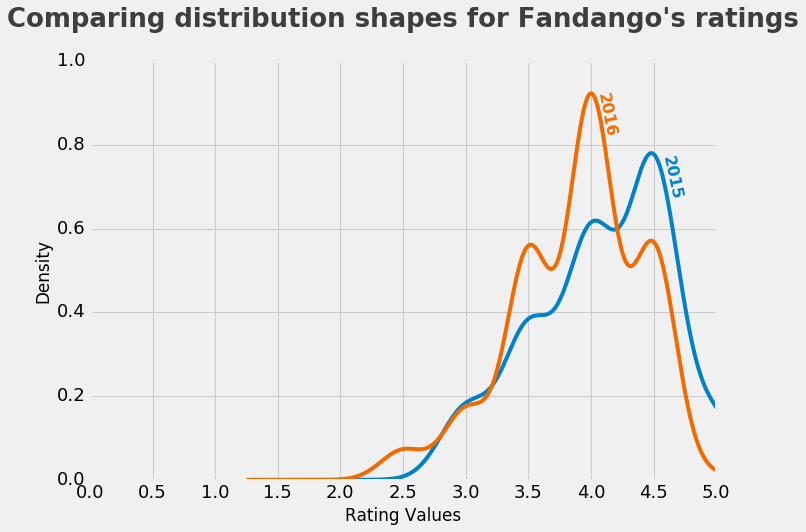

In [70]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

blue = (0/225, 114/225, 178/225)
vermillion = (213/225, 94/225, 0/225)

plt.style.use('fivethirtyeight')
fandango_only_2015['Fandango_Stars'].plot.kde(label = '2015', color = blue, figsize = (10,7))
fandango_only_2016['fandango'].plot.kde(label = '2016', color = vermillion)

plt.title("Comparing distribution shapes for Fandango's ratings",
          y = 1.07, fontsize = 26, weight = 'bold', alpha = .75 ) 
plt.xlabel('Rating Values')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.tick_params(axis = 'both', labelsize = 18)
plt.text(x=4.03, y=.9, s = '2016', color= vermillion, weight='bold', rotation=-79, fontsize=16)
plt.text(x=4.55, y=.75, s = '2015', color= blue, weight='bold', rotation=-78, fontsize=16)
plt.show()

 - Both distributions are left skewed, but the 2016 distribution is shifted towards the left.
 - Both have peaks on the high rating side, but we can see that the ratings for 2016 were slightly lower than for 2015.

### Frequency Distribution Tables

In [71]:
fandango_only_2015['Fandango_Stars'].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [72]:
fandango_only_2016['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

Because we have a different number of movies in each table, it would be more useful to compare relative frequencies.

In [73]:
fandango_only_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [74]:
fandango_only_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

 - In 2016, less than 1% of movies got a perfect 5 star rating as compared to almost 7% in 2015. 
 - The lowest rating in 2015 (2.5 stars) is also lower than the lowest rating in 2016 (3 stars).
 - However, about 65% of movies got 4.5 and 4 star ratings both years. These are high ratings and call into question the direction of the difference.

### Summary Statistics

In [75]:
mean_2015 = fandango_only_2015['Fandango_Stars'].mean()
mean_2016 = fandango_only_2016['fandango'].mean()

median_2015 = fandango_only_2015['Fandango_Stars'].median()
median_2016 = fandango_only_2016['fandango'].median()

mode_2015 = fandango_only_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_only_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


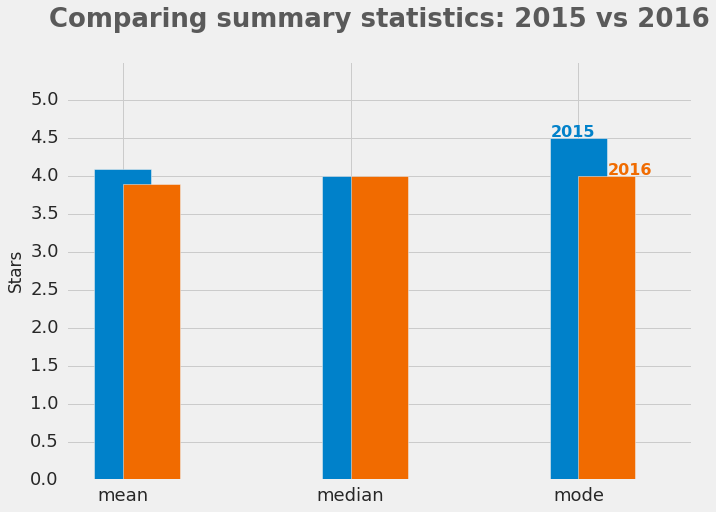

In [132]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(align= 'center', color = blue, label = '2015', width = .25, rot = 0)
summary['2016'].plot.bar(align = 'edge', color = vermillion, label = '2016', width = .25, rot = 0, figsize = (10,7))

plt.title('Comparing summary statistics: 2015 vs 2016',
         y = 1.07, fontsize = 26, weight = 'bold', alpha = .75 )
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.tick_params(axis = 'both', labelsize = 18)
plt.text(x=2.13, y=4.01, s = '2016', color= vermillion, weight='bold', fontsize=16)
plt.text(x=1.88, y=4.51, s = '2015', color= blue, weight='bold', fontsize=16)
plt.show()

 - The mean for 2016 is slightly lower, as is the mode.
 - The median value is the same across both years.
 - However, it does seem this supports what we saw in the Kernel Density Diagram- movies in 2016 were ranked slightl ylower than movies in 2015.

### Conclusion

There is a slight difference between Fandango's ratings for popular movies in 2015 compared to popular movies in 2016. Movies released in 2016 were rated lower.  
It cannot be certain what caused the change, but it could be Fandango's response to Walt's article about their biased rating system. 